In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from PIL import Image
print(os.listdir("./common/data"))

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

['chest_xray', 'resampled', 'TEST']


Using TensorFlow backend.


# Resample Data Into New Dataset

# Resample Train Data

In [2]:
from common.src import resample as res

In [3]:
from imblearn.under_sampling import AllKNN

path = r'C:\Users\mmitk\dev\2020\pneumonia\common\data\chest_xray\train'
All = AllKNN()

In [4]:
res.resample_directory(All, path, 'AllKNN', val = False)

# Load Data

In [5]:
train_folder= './common/data/resampled/AllKNN/train'
val_folder = './common/data/chest_xray/val/'
test_folder = './common/data/chest_xray/test/'

In [6]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

In [7]:
# test
os.listdir(test_folder)
train_n = test_folder+'NORMAL/'
train_p = test_folder+'PNEUMONIA/'

In [8]:
from common.src import util

train_datagen = util.create_train_datagen()
test_datagen = util.create_test_datagen()

training_set = util.create_generator_set(train_datagen, './common/data/resampled/AllKNN/train')
validation_generator = util.create_generator_set(test_datagen, './common/data/chest_xray/val/')
test_set = util.create_generator_set(test_datagen, './common/data/chest_xray/test/', batch_size = 1, shuffle = False) 

Found 4944 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Create Model

In [9]:
from common.src import models

cnn = models.CNNModel(patience_s = 49)
cnn.create_model()
cnn.summary()

# Fit Model

In [10]:
cnn_model = cnn.fit_generator(training_set, validation_generator, epochs=50)

Epoch 1/50
163/163 [==============================] - 19s 118ms/step - loss: 0.3559 - tp: 4343.0000 - fp: 767.0000 - tn: 4417.0000 - fn: 841.0000 - accuracy: 0.8449 - precision: 0.8499 - recall: 0.8378 - auc: 0.9223 - val_loss: 0.3837 - val_tp: 266.0000 - val_fp: 19.0000 - val_tn: 285.0000 - val_fn: 38.0000 - val_accuracy: 0.9062 - val_precision: 0.9333 - val_recall: 0.8750 - val_auc: 0.9219
Epoch 2/50
163/163 [==============================] - 14s 83ms/step - loss: 0.1959 - tp: 4780.0000 - fp: 428.0000 - tn: 4788.0000 - fn: 436.0000 - accuracy: 0.9172 - precision: 0.9178 - recall: 0.9164 - auc: 0.9768 - val_loss: 0.3346 - val_tp: 266.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 38.0000 - val_accuracy: 0.8438 - val_precision: 0.8235 - val_recall: 0.8750 - val_auc: 0.9180
Epoch 3/50
163/163 [==============================] - 14s 87ms/step - loss: 0.1850 - tp: 4793.0000 - fp: 400.0000 - tn: 4784.0000 - fn: 391.0000 - accuracy: 0.9237 - precision: 0.9230 - recall: 0.9246 - auc: 0.9

Epoch 22/50
163/163 [==============================] - 13s 78ms/step - loss: 0.0920 - tp: 5017.0000 - fp: 163.0000 - tn: 5021.0000 - fn: 167.0000 - accuracy: 0.9682 - precision: 0.9685 - recall: 0.9678 - auc: 0.9938 - val_loss: 0.2089 - val_tp: 285.0000 - val_fp: 38.0000 - val_tn: 266.0000 - val_fn: 19.0000 - val_accuracy: 0.9062 - val_precision: 0.8824 - val_recall: 0.9375 - val_auc: 0.9766
Epoch 23/50
163/163 [==============================] - 11s 70ms/step - loss: 0.0747 - tp: 5059.0000 - fp: 157.0000 - tn: 5059.0000 - fn: 157.0000 - accuracy: 0.9699 - precision: 0.9699 - recall: 0.9699 - auc: 0.9960 - val_loss: 0.1917 - val_tp: 285.0000 - val_fp: 19.0000 - val_tn: 285.0000 - val_fn: 19.0000 - val_accuracy: 0.9375 - val_precision: 0.9375 - val_recall: 0.9375 - val_auc: 0.9961
Epoch 24/50
163/163 [==============================] - 13s 79ms/step - loss: 0.0805 - tp: 5039.0000 - fp: 161.0000 - tn: 5039.0000 - fn: 161.0000 - accuracy: 0.9690 - precision: 0.9690 - recall: 0.9690 - auc: 0

163/163 [==============================] - 13s 79ms/step - loss: 0.0532 - tp: 5088.0000 - fp: 115.0000 - tn: 5085.0000 - fn: 112.0000 - accuracy: 0.9782 - precision: 0.9779 - recall: 0.9785 - auc: 0.9978 - val_loss: 0.1707 - val_tp: 285.0000 - val_fp: 19.0000 - val_tn: 285.0000 - val_fn: 19.0000 - val_accuracy: 0.9375 - val_precision: 0.9375 - val_recall: 0.9375 - val_auc: 0.9805 - fn: 92.0000 - accuracy: 0.9775 - precision: 0.9775 - recall: 0.
Epoch 43/50
163/163 [==============================] - 12s 76ms/step - loss: 0.0588 - tp: 5084.0000 - fp: 112.0000 - tn: 5088.0000 - fn: 116.0000 - accuracy: 0.9781 - precision: 0.9784 - recall: 0.9777 - auc: 0.9973 - val_loss: 0.1100 - val_tp: 285.0000 - val_fp: 0.0000e+00 - val_tn: 304.0000 - val_fn: 19.0000 - val_accuracy: 0.9688 - val_precision: 1.0000 - val_recall: 0.9375 - val_auc: 1.0000
Epoch 44/50
163/163 [==============================] - 13s 80ms/step - loss: 0.0574 - tp: 5098.0000 - fp: 98.0000 - tn: 5102.0000 - fn: 102.0000 - accura

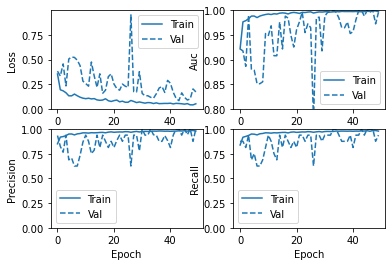

In [11]:
cnn.plot_history()

In [12]:
cnn.get_classification_report(test_set)

              precision    recall  f1-score   support

      NORMAL       0.88      0.74      0.81       234
   PNEUMONIA       0.86      0.94      0.90       390

    accuracy                           0.87       624
   macro avg       0.87      0.84      0.85       624
weighted avg       0.87      0.87      0.86       624



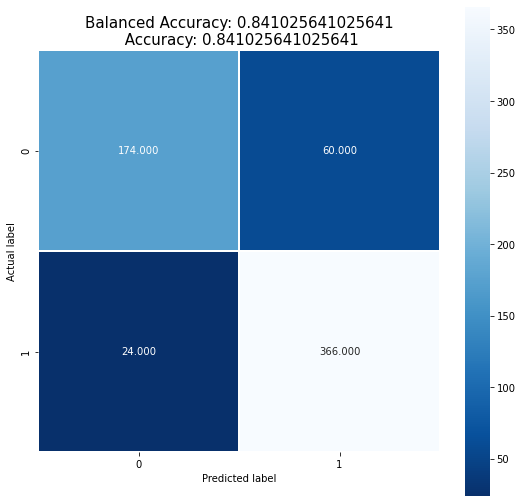

In [13]:
cnn.display_confusion_matrix(test_set)